# Mathematical formulation of the PageRank algorithm
Via https://en.wikipedia.org/wiki/PageRank

<br>Let $ \ M \ $ be the column-stochastic adjacency matrix of a directed graph:

$$
M = \begin{bmatrix} 0 & 0 & 0 & .5 & .33 \\ .33 & 0 & 0 & 0 & .33 \\ .33 & .5 & 0 & 0 & .33 \\ .33 & .5 & .5 & 0 & 0 \\ 0 & 0 & .5 & .5 & 0 \end{bmatrix}
$$

The length of the matrix $ \ M \ $ is denoted by $ \ n \ $:

$$
n = 5
$$

Let $ \mathbf{pagerank\_scores} \ $ be a vector of length $ n \ $ whose entries are all equal to $ \frac{1}{n} \ $ (we start with a uniform distribution of the PageRank scores):

$$
\mathbf{pagerank\_scores} = [0.2, 0.2, 0.2, 0.2, 0.2]
$$

The PageRank scores $ \mathbf{pagerank\_scores} $ are computed using the power iteration method, continuously updating the vector $ \mathbf{pagerank\_scores} \ $ by dotting it against the matrix $ \ M \ $:

$$
\mathbf{pagerank\_scores} = \frac{{1 - \text{{damping\_factor}}}}{n} + \text{{damping\_factor}} \times M \times \mathbf{v}
$$




In [15]:
import numpy as np

def pagerank_original(adj_matrix, max_iterations=100, damping_factor=0.85, epsilon=1e-8):
    """
    Compute PageRank using the power iteration method.

    Parameters:
    - adj_matrix: The adjacency matrix representing the link structure of the web graph.
    - damping_factor: The probability of following a link (typically set to 0.85).
    - epsilon: Convergence threshold.
    - max_iterations: Maximum number of iterations.

    Returns:
    - A vector representing the PageRank scores for each node.
    """
    # Input validation
    if not isinstance(adj_matrix, np.ndarray) or adj_matrix.ndim != 2 or adj_matrix.shape[0] != adj_matrix.shape[1]:
        raise ValueError("Input must be a square numpy array representing the adjacency matrix of a graph.")

    n = len(adj_matrix)
    #print(n)

    # Initialize PageRank scores
    pagerank_scores = np.ones(n) / n
    print(f'Initial scores: {pagerank_scores}')

    # Initialize a vector to store the scores at each iteration
    scores_at_each_iteration = []
    # Append initial scores
    scores_at_each_iteration.append(pagerank_scores)

    for i in range(max_iterations):
        prev_pagerank_scores = pagerank_scores.copy()
        #print(f'Scores at iteration {i}: {pagerank_scores}')

        # Perform the power iteration
        pagerank_scores = (1 - damping_factor) / n + damping_factor * np.dot(adj_matrix, prev_pagerank_scores)

        # Normalize the scores to [0, 1] 
        pagerank_scores = pagerank_scores / np.sum(pagerank_scores)
        #capture the scores at each iteration
        scores_at_each_iteration.append(pagerank_scores)

        # Check for convergence using the L1 norm
        if np.linalg.norm(pagerank_scores - prev_pagerank_scores, 1) < epsilon:
            print(f'Converged due to L1 norm < epsilon at iteration {i}: \nL1 = {np.linalg.norm(pagerank_scores - prev_pagerank_scores, 1)}')
            break

    return pagerank_scores, scores_at_each_iteration
# end of pagerank_original

# sample adjacency matrices


M = np.array([
    [0, 0, 0, .5, .33],
    [.33, 0, 0, 0, .33],
    [.33, .5, 0, 0, .33],
    [.33, .5, .5, 0, 0],
    [0, 0, .5, .5, 0]
])

N = np.array([
    [0, 0, 0, .75, 0],
    [1, 0, 0, 0, 1],
    [0, .75, 0, 0, 0],
    [0, .25, .5, 0, 0],
    [0, 0, .5, .25, 0]
])

print("Adjacency Matrix:\n", M, "\n")

normalized_scores, scores_at_each_iteration = pagerank_original(M, 100)
print("Normalized PageRank Scores:", normalized_scores, "\n")



Adjacency Matrix:
 [[0.   0.   0.   0.5  0.33]
 [0.33 0.   0.   0.   0.33]
 [0.33 0.5  0.   0.   0.33]
 [0.33 0.5  0.5  0.   0.  ]
 [0.   0.   0.5  0.5  0.  ]] 

Transposed Adjacency Matrix:
 [[0.   0.   0.   0.75 0.  ]
 [1.   0.   0.   0.   1.  ]
 [0.   0.75 0.   0.   0.  ]
 [0.   0.25 0.5  0.   0.  ]
 [0.   0.   0.5  0.25 0.  ]] 

Initial scores: [0.2 0.2 0.2 0.2 0.2]
Converged due to L1 norm < epsilon at iteration 31: 
L1 = 6.3327458832418415e-09
Normalized PageRank Scores: [0.19202387 0.14582257 0.20801448 0.23506484 0.21907423] 



<strong>Below block courtesy of NetworkX example documentation</strong>, via 'https://networkx.org/documentation/latest/auto_examples/drawing/plot_directed.html#sphx-glr-auto-examples-drawing-plot-directed-py'
<i>This code has been modified to suit the needs of this project.</i>


[0.14669443 0.11139948 0.15891027 0.17957508 0.16735924]

In [89]:
# sum of all scores should be 1
print("Sum of all scores:", np.sum(normalized_scores))

Sum of all scores: 0.9999999999999998


12


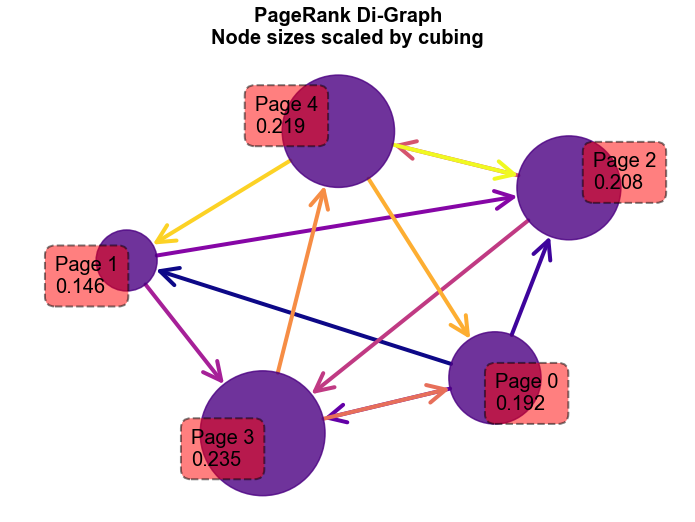

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 7))  

seed = 4277
# copy the 
G = nx.DiGraph(M.T)
pos = nx.spring_layout(G, seed=seed, weight=0.9)
#print(pos)

pos_nodeLabel = pos.copy()
pos_nodeLabel[0] = pos[0] + np.array([0, -0.1])
pos_nodeLabel[1] = pos[1] + np.array([-0.3, -0.1])
pos_nodeLabel[2] = pos[2] + np.array([0.1, 0.1])
pos_nodeLabel[3] = pos[3] + np.array([-0.3, -0.1])
pos_nodeLabel[4] = pos[4] + np.array([-0.35, 0.1])



# exponential scaling of node sizes
node_sizes = [(1.2 * (score*100)**3) for score in normalized_scores]

m = G.number_of_edges()
print(m)
edge_colors = range(0, m + 0)
edge_alphas = np.ones(m)
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo", margins=0.2, alpha=0.8)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=45,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=4,
)

normalized_scores_rounded = [round(score, 3) for score in normalized_scores]

# set node labels
labels = {}
for node in G.nodes():
    labels[node] = f'Page {node}\n{normalized_scores_rounded[node]}'

# draw node labels
node_labels = nx.draw_networkx_labels(G, pos=pos_nodeLabel, labels=labels,  font_size=20, font_color="black", horizontalalignment="left", clip_on=False, bbox=dict(facecolor='red', boxstyle='round,pad=0.5', alpha=0.5, edgecolor='black', linewidth=2, linestyle='dashed'))

# set alpha value for each edge
for i in range(m):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

# set the size of the plot
plt.tight_layout()
ax = plt.subplot(1, 1, 1)
ax.set_axis_off()
plt.title("PageRank Di-Graph\nNode sizes scaled by cubing", fontsize=20, fontweight="bold", fontfamily="Arial", color="black" )
#plt.colorbar(pc, ax=ax)
plt.show()

<i>Time to graph implementation completion: 3 hours...</i>

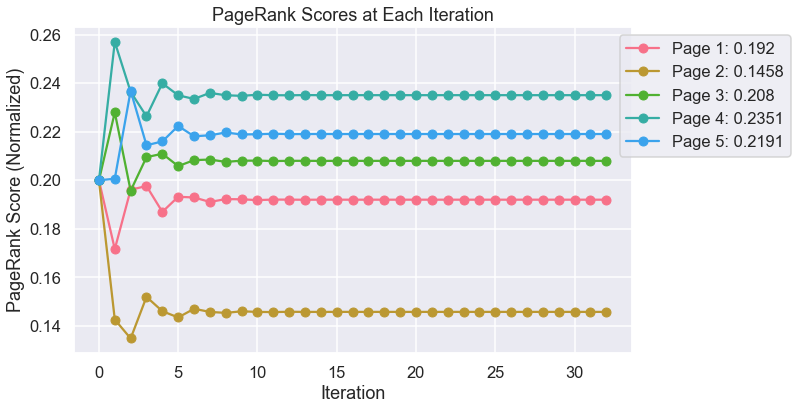

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set style and context
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("husl")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)


# Plot each page's score versus the iteration number
for i in range(len(normalized_scores)):
    page_scores_at_each_iteration = [scores[i] for scores in scores_at_each_iteration]
    ax.plot(range(len(page_scores_at_each_iteration)), page_scores_at_each_iteration, label=f'Page {i+1}: {np.round(normalized_scores[i],4)}', marker='o')

# Set labels and legend
ax.set_xlabel('Iteration')
ax.set_ylabel('PageRank Score (Normalized)')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))


plt.title('PageRank Scores at Each Iteration')
plt.show()

In [99]:
# wikipedia example
# Uses the power method

import numpy as np

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    print("Initial scores:", v)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
        #print(v)
    return v

M = np.array([  
    [0, .33, .33, .33, 0],
    [0, 0, .5, .5, 0],
    [0, 0, 0, .5, .5],
    [.5, 0, 0, 0, .5],
    [.33, .33, .33, 0, 0]])

N = np.array([
    [0, 1, 0, 0, 0],
    [0, 0, .75, .25, 0],
    [0, 0, 0, .5, .5],
    [.75, 0, 0, 0, .25],
    [0, 1, 0, 0, 0]
])

N = N.T
M = M.T
wiki_scores = pagerank(N, 57)

print("Raw scores:", wiki_scores)
print("Sum of raw scores:", np.sum(wiki_scores))

# normalize
wiki_scores = wiki_scores / np.sum(wiki_scores)
print("Normalized scores:", wiki_scores)
print("Sum after normalizing:", np.sum(wiki_scores))
print("Our scores:", normalized_scores)


Initial scores: [0.2 0.2 0.2 0.2 0.2]
Raw scores: [0.14721707 0.29190931 0.21609218 0.18386991 0.16091153]
Sum of raw scores: 1.0000000000000009
Normalized scores: [0.14721707 0.29190931 0.21609218 0.18386991 0.16091153]
Sum after normalizing: 1.0
Our scores: [0.14721707 0.29190931 0.21609218 0.18386991 0.16091153]
